# Machine Learning Algorithms - SEER Breast Cancer Data

### Importing Libraries and Dataset

In [1]:
# Importing all the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing dataset
df_seerdata = pd.read_csv("Breast_cancer_preprocessed_data.csv")

### Quick Data Exploration

In [3]:
# Check the shape of the dataset
df_seerdata.shape

(4023, 16)

There are 4023 rows and 16 columns


In [4]:
# Check first-5 records
df_seerdata.head()

,Unnamed: 0,Age,Race,MaritalStatus,TStage,NStage,6thStage,Grade,AStage,TumorSize,EstrogenStatus,ProgesteroneStatus,RegionalNodeExamined,ReginolNodePositive,SurvivalMonths,Status
0,0,43,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),T2,N3,IIIC,Moderately differentiated; Grade II,Regional,40,Positive,Positive,19,11,1,Alive
1,1,47,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),T2,N2,IIIA,Moderately differentiated; Grade II,Regional,45,Positive,Positive,25,9,2,Alive
2,2,67,White,Married (including common law),T2,N1,IIB,Poorly differentiated; Grade III,Regional,25,Positive,Positive,4,1,2,Dead
3,3,46,White,Divorced,T1,N1,IIA,Moderately differentiated; Grade II,Regional,19,Positive,Positive,26,1,2,Dead
4,4,63,White,Married (including common law),T2,N2,IIIA,Moderately differentiated; Grade II,Regional,35,Positive,Positive,21,5,3,Dead


In [5]:
# checking the NaN values in df_seerdata
df_seerdata.isna().sum()

Unnamed: 0              0
Age                     0
Race                    0
MaritalStatus           0
TStage                  0
NStage                  0
6thStage                0
Grade                   0
AStage                  0
TumorSize               0
EstrogenStatus          0
ProgesteroneStatus      0
RegionalNodeExamined    0
ReginolNodePositive     0
SurvivalMonths          0
Status                  0
dtype: int64

- There are no NaN values in any column. 
- Unnamed column is an empty column, and it can be removed

In [6]:
# droping a 'Unnamed: 3' column, because iy doesnot consists of any data
df_seerdata.drop(['Unnamed: 0'], axis=1, inplace=True)

Column 'Unnamed: 0' has deleted

In [7]:
# Checking the duplicates

duplicate= df_seerdata[df_seerdata.duplicated()]
duplicate

,Age,Race,MaritalStatus,TStage,NStage,6thStage,Grade,AStage,TumorSize,EstrogenStatus,ProgesteroneStatus,RegionalNodeExamined,ReginolNodePositive,SurvivalMonths,Status


In [8]:
df_seerdata.shape

(4023, 15)

In [9]:
# Get column names
df_seerdata.columns

Index(['Age', 'Race', 'MaritalStatus', 'TStage', 'NStage', '6thStage', 'Grade',
       'AStage', 'TumorSize', 'EstrogenStatus', 'ProgesteroneStatus',
       'RegionalNodeExamined', 'ReginolNodePositive', 'SurvivalMonths',
       'Status'],
      dtype='object')

converting categorical data into a numarical data

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1 = df_seerdata.copy(deep = True)
df1['6thStage'] = le.fit_transform(df1['6thStage'])
df1['NStage'] = le.fit_transform(df1['NStage'])
df1['TStage'] = le.fit_transform(df1['TStage'])
df1['Race'] = le.fit_transform(df1['Race'])
df1['MaritalStatus'] = le.fit_transform(df1['MaritalStatus'])
df1['Grade'] = le.fit_transform(df1['Grade'])
df1['AStage'] = le.fit_transform(df1['AStage'])
df1['EstrogenStatus'] = le.fit_transform(df1['EstrogenStatus'])
df1['ProgesteroneStatus'] = le.fit_transform(df1['ProgesteroneStatus'])
df1['Status'] = le.fit_transform(df1['Status'])

In [11]:
df1.head(5)

,Age,Race,MaritalStatus,TStage,NStage,6thStage,Grade,AStage,TumorSize,EstrogenStatus,ProgesteroneStatus,RegionalNodeExamined,ReginolNodePositive,SurvivalMonths,Status
0,43,1,1,1,2,4,0,1,40,1,1,19,11,1,0
1,47,1,1,1,1,2,0,1,45,1,1,25,9,2,0
2,67,2,1,1,0,1,1,1,25,1,1,4,1,2,1
3,46,2,0,0,0,0,0,1,19,1,1,26,1,2,1
4,63,2,1,1,1,2,0,1,35,1,1,21,5,3,1


In [12]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

df1['Age'] = mms.fit_transform(df1[['Age']]) 
df1['TumorSize'] = ss.fit_transform(df1[['TumorSize']])
df1['RegionalNodeExamined'] = ss.fit_transform(df1[['RegionalNodeExamined']])
df1['ReginolNodePositive'] = ss.fit_transform(df1[['ReginolNodePositive']])
df1['SurvivalMonths'] = ss.fit_transform(df1[['SurvivalMonths']])
df1.head()

,Age,Race,MaritalStatus,TStage,NStage,6thStage,Grade,AStage,TumorSize,EstrogenStatus,ProgesteroneStatus,RegionalNodeExamined,ReginolNodePositive,SurvivalMonths,Status
0,0.333333,1,1,1,2,4,0,1,0.450929,1,1,0.573086,1.339018,-3.067246,0
1,0.435897,1,1,1,1,2,0,1,0.687686,1,1,1.313897,0.947559,-3.023616,0
2,0.948718,2,1,1,0,1,1,1,-0.259345,1,1,-1.278941,-0.618278,-3.023616,1
3,0.410256,2,0,0,0,0,0,1,-0.543454,1,1,1.437366,-0.618278,-3.023616,1
4,0.846154,2,1,1,1,2,0,1,0.214171,1,1,0.820023,0.164641,-2.979986,1


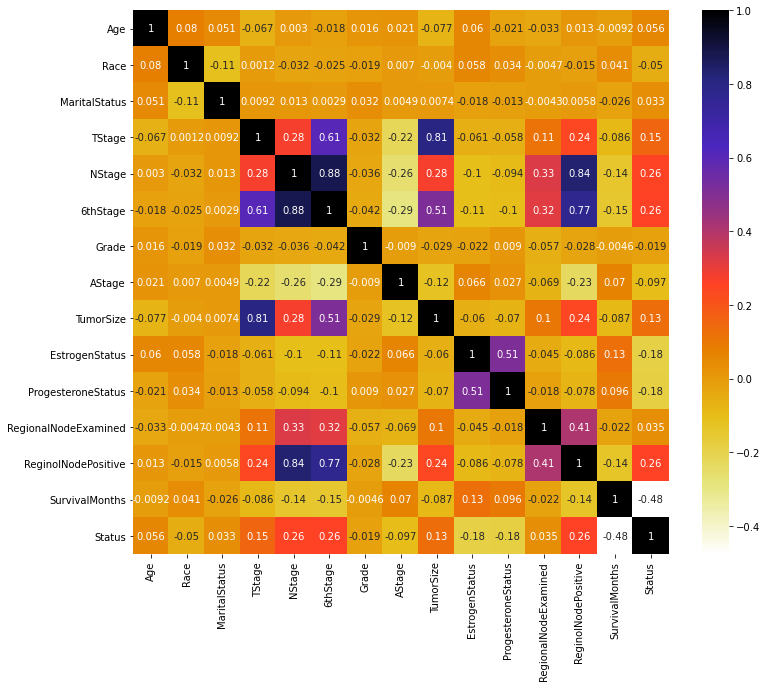

In [13]:
import seaborn as sns
# Applying Pearson Correlation on X_train
plt.figure(figsize=(12,10))
cor = df1.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

Maximum correlated : 6th Stage and NStage.

In [14]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [15]:
corr_features = correlation(df1, 0.9)
len(set(corr_features))

0

In [16]:
corr_features

set()

Dropping 6thStage column..  

In [17]:
df1.drop(corr_features,axis=1, inplace=True)
#X_test.drop(corr_features,axis=1)
#X_train.drop(['6thStage'], axis=1, inplace=True)
#X_test.drop(['6thStage'], axis=1, inplace=True)

In [18]:
# Define X and y
X = df1.iloc[:,:-1]
y = df1.iloc[:,-1]
X,y

(           Age  Race  MaritalStatus  TStage  NStage  6thStage  Grade  AStage  \
 0     0.333333     1              1       1       2         4      0       1   
 1     0.435897     1              1       1       1         2      0       1   
 2     0.948718     2              1       1       0         1      1       1   
 3     0.410256     2              0       0       0         0      0       1   
 4     0.846154     2              1       1       1         2      0       1   
 ...        ...   ...            ...     ...     ...       ...    ...     ...   
 4018  0.564103     2              1       0       0         0      3       1   
 4019  0.589744     2              1       0       1         2      1       1   
 4020  0.589744     2              0       0       0         0      0       1   
 4021  0.769231     1              1       0       0         0      0       1   
 4022  0.820513     2              0       0       0         0      0       1   
 
       TumorSize  Estrogen

In [19]:
# split dataset into train and test before applying the pearson correlation test. 
# If we dont split, we might get overfitting issues. So, lets perform splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
X_train.shape, X_test.shape

((3218, 14), (805, 14))

In [20]:
X_train.shape

(3218, 14)

In [21]:
X_train.columns

Index(['Age', 'Race', 'MaritalStatus', 'TStage', 'NStage', '6thStage', 'Grade',
       'AStage', 'TumorSize', 'EstrogenStatus', 'ProgesteroneStatus',
       'RegionalNodeExamined', 'ReginolNodePositive', 'SurvivalMonths'],
      dtype='object')

In [22]:
X_test.shape

(805, 14)

In [23]:
#Check the balancing
y_train.value_counts()

0    2732
1     486
Name: Status, dtype: int64

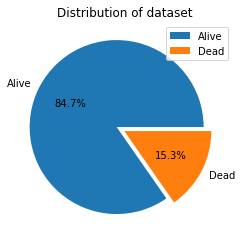

In [24]:
stat = df_seerdata['Status'].value_counts().reset_index(name='counts')
plt.pie(x='counts',data=stat,labels='index',autopct='%1.1f%%',explode=[0.1, 0])
plt.title("Distribution of dataset")
plt.legend()
plt.show()

In [25]:
! pip install imbalanced-learn

In [26]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
X_train, y_train = smt.fit_resample(X_train, y_train)
X_test, y_test = smt.fit_resample(X_test, y_test)
#Check the balancing
y_train.value_counts()

0    2732
1    2732
Name: Status, dtype: int64

In [27]:
y_test.value_counts()

0    675
1    675
Name: Status, dtype: int64

In [28]:
#!pip install pandas-profiling

In [29]:
#!pip install catboost

In [30]:
import sys
import os
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#from sklearn.utils._testing import ignore_warnings
#import pandas_profiling as pp
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score,accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import NuSVC, SVC,LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
#from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

In [31]:
!pip install lazypredict

In [32]:
# Importing lazypredict
import lazypredict
from lazypredict.Supervised import LazyClassifier

AttributeError: 'NoneType' object has no attribute 'split'

In [ ]:
# passing the train test splits to the lazy predict classifier
clf = LazyClassifier(verbose=0,ignore_warnings=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models

Lazypredict is a python library used to quickly identify the promising models for further exploration. 
Let's try different algorithms now. 

# 1. XGBClassifier

In [37]:
# Define model,fitting the model and predicting values and stores in y_pred
xgbc = XGBClassifier()
xgbc.fit(X_train, y_train)
y_pred = xgbc.predict(X_test)

Confusion Matrix:
 [[649  26]
 [114 561]]


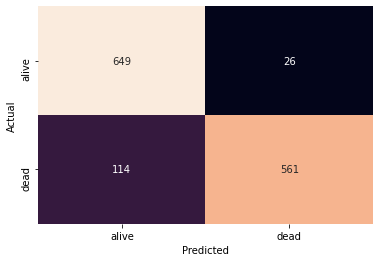

In [38]:
# printing confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cm)
labels=['alive','dead']
df_cm = pd.DataFrame(cm, labels, labels)
sns.heatmap(df_cm, annot=True,cbar=False,fmt='g')
plt.xlabel('Predicted') 
plt.ylabel('Actual') 
plt.show()

In [39]:
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :", accuracy)

Accuracy : 0.8962962962962963


# 2. LGBMClassifier

In [40]:
# Define model,fitting the model and predicting values and stores in y_pred
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)

[LightGBM] [Info] Number of positive: 2732, number of negative: 2732
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001299 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1305
[LightGBM] [Info] Number of data points in the train set: 5464, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


Confusion Matrix:
 [[650  25]
 [110 565]]


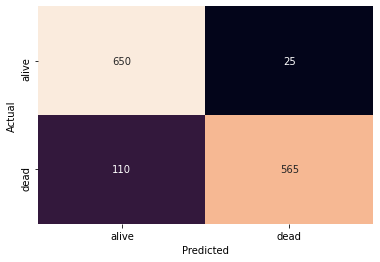

In [41]:
# printing confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cm)
labels=['alive','dead']
df_cm = pd.DataFrame(cm, labels, labels)
sns.heatmap(df_cm, annot=True,cbar=False,fmt='g')
plt.xlabel('Predicted') 
plt.ylabel('Actual') 
plt.show()

In [42]:
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :", accuracy)

Accuracy : 0.9


# 3. RandomForestClassifier	

In [43]:
rfc = RandomForestClassifier(n_estimators=50, random_state=0)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

Confusion Matrix:
 [[636  39]
 [205 470]]


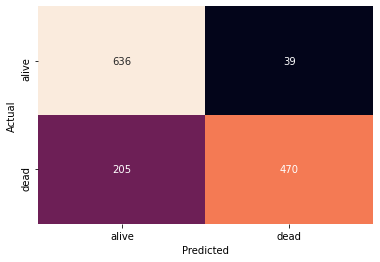

In [44]:
# printing confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cm)
labels=['alive','dead']
df_cm = pd.DataFrame(cm, labels, labels)
sns.heatmap(df_cm, annot=True,cbar=False,fmt='g')
plt.xlabel('Predicted') 
plt.ylabel('Actual') 
plt.show()

In [45]:
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :", accuracy)

Accuracy : 0.8192592592592592


# 4. AdaBoostClassifier

In [46]:
abc = AdaBoostClassifier(n_estimators=100, random_state=42)
abc.fit(X_train, y_train)
predictions = abc.predict(X_test)

Confusion Matrix:
 [[636  39]
 [205 470]]


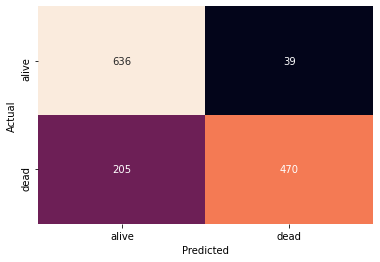

In [47]:
# printing confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cm)
labels=['alive','dead']
df_cm = pd.DataFrame(cm, labels, labels)
sns.heatmap(df_cm, annot=True,cbar=False,fmt='g')
plt.xlabel('Predicted') 
plt.ylabel('Actual') 
plt.show()

In [48]:
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :", accuracy)

Accuracy : 0.8192592592592592


# 5. SVC

In [49]:
lsvc = LinearSVC(random_state=0)
lsvc.fit(X_train, y_train)
y_pred = lsvc.predict(X_test)

Confusion Matrix:
 [[529 146]
 [160 515]]


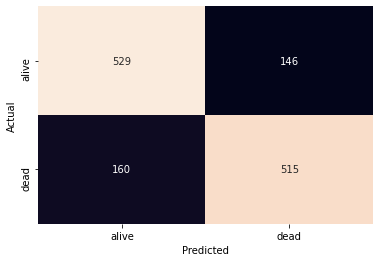

In [50]:
# printing confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cm)
labels=['alive','dead']
df_cm = pd.DataFrame(cm, labels, labels)
sns.heatmap(df_cm, annot=True,cbar=False,fmt='g')
plt.xlabel('Predicted') 
plt.ylabel('Actual') 
plt.show()

In [51]:
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7733333333333333


# 6. LogisticRegression

In [52]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [53]:
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :", accuracy)

Accuracy : 0.7762962962962963


Confusion Matrix:
 [[526 149]
 [153 522]]


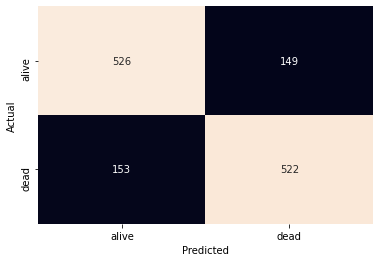

In [54]:
# printing confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cm)
labels=['alive','dead']
df_cm = pd.DataFrame(cm, labels, labels)
sns.heatmap(df_cm, annot=True,cbar=False,fmt='g')
plt.xlabel('Predicted') 
plt.ylabel('Actual') 
plt.show()

# 7. Decision Tree Classifier

In [55]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

In [56]:
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :", accuracy)

Accuracy : 0.7711111111111111


Confusion Matrix:
 [[579  96]
 [213 462]]


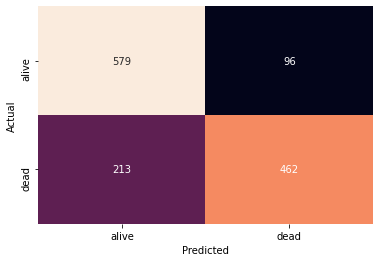

In [57]:
# printing confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cm)
labels=['alive','dead']
df_cm = pd.DataFrame(cm, labels, labels)
sns.heatmap(df_cm, annot=True,cbar=False,fmt='g')
plt.xlabel('Predicted') 
plt.ylabel('Actual') 
plt.show()

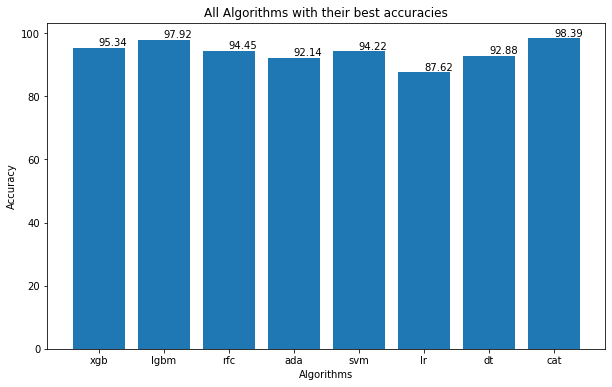

In [58]:
plt.figure(figsize=(10, 6))
models=['xgb','lgbm','rfc','ada','svm','lr','dt','cat']
accuracy=[95.34,97.92,94.45,92.14,94.22,87.62,92.88,98.39]
barplot = plt.bar(models,accuracy)
for bar in barplot:
    yval=bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0,yval,str(yval),va="bottom")
            
plt.title("All Algorithms with their best accuracies")
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()